In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Clean Data
After fetching all our predictors from Etherscan's APIs, we had to clean the data and upsample it.

In [ ]:
# convert csv to pd
rawData = pd.read_csv('data.csv')
rawData.head()

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y,626.0,35.0,591.0,0.0,0.0,0.0


In [ ]:
# view all data columns
df_raw_all = pd.DataFrame(rawData)
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614 Ether,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866 Ether,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497 Ether,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0 Ether,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0 Ether,709,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.70176396,924,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797279,214,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954752,28,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.17227,22,N,104.0,104.0,0.0,0.0,0.0,0.0


In [ ]:
df_raw_all.dtypes

Unnamed: 0          int64
WID                object
Label              object
Eth Balance        object
Txn Count          object
Exchange           object
ERC 20 Txn        float64
ERC 20 Txn In     float64
ERC 20 Txn Out    float64
ERC721 Txn Out    float64
ERC721 Txn In     float64
ERC721 Txn        float64
dtype: object

We can see that Eth Balance has the word "Ether" trailing for some of the entries, while other entries do not. However, this causes Eth Balance to be of type object instead of float64. 

We see that Txn Count is also of object type instead of float64. 

We would fix these. 

### Remove "Ether"

In [ ]:
# do away ether by splitting the string and taking the first item, which is the number, and drop "ether"
df_raw_all['Eth Balance'] = df_raw_all.apply(lambda row:row['Eth Balance'].split()[0], axis =1)
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.00477614,522,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.25604866,"58,568",Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.06097497,5,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0,"59,516",Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0,709,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.70176396,924,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.19797279,214,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858954752,28,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.17227,22,N,104.0,104.0,0.0,0.0,0.0,0.0


### Fix to Float

In [ ]:
# remove all commas from the numbers
df_raw_all['Eth Balance'] = df_raw_all['Eth Balance'].str.replace(',','')
df_raw_all['Txn Count'] = df_raw_all['Txn Count'].str.replace(',','')

# fix object to float 
df_raw_all['Eth Balance'] = df_raw_all['Eth Balance'].astype(float, errors = 'raise')
df_raw_all['Txn Count'] = df_raw_all['Txn Count'].astype(float, errors = 'raise')
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,NaN,NaN,NaN
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,NaN,NaN,NaN
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0


In [ ]:
df_raw_all.dtypes

Unnamed: 0          int64
WID                object
Label              object
Eth Balance       float64
Txn Count         float64
Exchange           object
ERC 20 Txn        float64
ERC 20 Txn In     float64
ERC 20 Txn Out    float64
ERC721 Txn Out    float64
ERC721 Txn In     float64
ERC721 Txn        float64
dtype: object

All our prediction variables (Eth Balance, Txn Count, ERC 20 Txn, ERC 20 Txn In, ERC 20 Txn Out, ERC 721 Txn, ERC 721 Txn In, ERC 721 Txn Out) are now of type float64.

### Check for Missing Values

In [ ]:
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
count,844.000000,8.440000e+02,8.430000e+02,839.000000,839.000000,839.000000,677.000000,677.000000,677.000000
mean,421.500000,1.863105e+04,2.594112e+05,2648.027414,1302.276520,1345.750894,7.751846,22.618907,30.370753
std,243.786108,1.355134e+05,1.022071e+06,4159.124985,2391.390169,2561.442066,53.849372,123.496686,166.356029
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.750000e+01,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.000000,0.000000,0.000000,0.000000
75%,632.250000,3.115703e+01,1.866600e+04,4518.500000,1015.000000,909.000000,0.000000,3.000000,4.000000
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.000000,1178.000000,2183.000000,2591.000000


From the count, we can see that 1 row of Txn Count is missing, as well as 5 rows of the 3 ERC 20 columns, and 167 rows of the 3 ERC 721 columns. 

We will fill in these values with the median of the respective data. 

### Clean Missing Rows of Columns

#### Fill in missing values with the median

In [ ]:
# To put the median value of each column into its missing rows:
df_raw_all.fillna(df_raw_all.median().round(1), inplace=True)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000


In [ ]:
# view data stats
df_raw_all

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0


All our prediction variables (Eth Balance, Txn Count, ERC 20 Txn, ERC 20 Txn In, ERC 20 Txn Out, ERC 721 Txn, ERC 721 Txn In, ERC 721 Txn Out) have no missing values. 

### New derived column

It may also be worthwhile to analyse the ratio between the "In" and "Out" transfers of token ERC 20. In crpyto, it shows the type of transactions done in the wallet, and may be a factor to determine what kind of wallet it is. 

In [ ]:
df_raw_all['Ratio Transfers'] = (df_raw_all['ERC 20 Txn In']/ df_raw_all['ERC 20 Txn Out']).round(2)
df_raw_all.head()

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0,0.61
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0,3.77
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0,0.50
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0,0.75
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0,0.06


In [ ]:
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,759.00
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,inf
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.00
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.54
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,14.81
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,inf


We note that "Ratio Transfers" only have 759 rows instead of the full 844 rows. Some rows of the "Ratio Transfers" column are missing as there is 0 ERC 20 Txn In and 0 ERC 20 Txn Out. We shall treat it as ratio = 1 as the number of In and Out transfers are the same. 

In [ ]:
# To put the median value of each column into its missing rows:
df_raw_all['Ratio Transfers'] = df_raw_all['Ratio Transfers'].fillna(1)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,844.0000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,inf
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,NaN
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.0000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.3400
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,8.9425
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,inf


We also want to change the value of inf to 1000 to be able to plot graphs for our EDA.

In [ ]:
df_raw_all['Ratio Transfers'] = df_raw_all['Ratio Transfers'].replace(float('inf'), 1000)
df_raw_all.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,844.000000,8.440000e+02,8.440000e+02,844.000000,844.000000,844.00000,844.000000,844.000000,844.000000,844.000000
mean,421.500000,1.863105e+04,2.591042e+05,2633.204976,1295.071090,1337.85545,6.218009,18.143365,24.361374,141.102500
std,243.786108,1.355134e+05,1.021503e+06,4151.220429,2386.116119,2555.88413,48.320351,110.956703,149.460893,334.389803
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,210.750000,1.619519e-02,2.775000e+01,8.000000,5.000000,1.00000,0.000000,0.000000,0.000000,1.000000
50%,421.500000,3.325601e-01,3.190000e+02,146.000000,86.000000,13.00000,0.000000,0.000000,0.000000,1.340000
75%,632.250000,3.115703e+01,1.850850e+04,4338.250000,980.000000,897.50000,0.000000,2.000000,2.000000,8.942500
max,843.000000,2.113030e+06,1.701732e+07,10058.000000,10000.000000,9994.00000,1178.000000,2183.000000,2591.000000,1000.000000


In [ ]:
# rename dataframe
df = pd.DataFrame(df_raw_all)
df

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
0,0,0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605,NaN,0.004776,522.0,Y,636.0,242.0,394.0,0.0,0.0,0.0,0.61
1,1,0xbb3fd383d1c5540e52ef0a7bcb9433375793aeaf,NaN,5.256049,58568.0,Y,10000.0,7902.0,2098.0,0.0,0.0,0.0,3.77
2,2,0x1ccbdff6336b1027995a27a77b41fa87eb6608a3,NaN,0.060975,5.0,Y,3.0,1.0,2.0,0.0,0.0,0.0,0.50
3,3,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,ABCC,0.000000,59516.0,Y,10001.0,4287.0,5714.0,0.0,0.0,0.0,0.75
4,4,0x2ddd202174a72514ed522e77972b461b03155525,Alcumex Exchange,0.000000,709.0,Y,626.0,35.0,591.0,0.0,0.0,0.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0,1.05
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0,1.56
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0,1.00
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0,1000.00


However, we note that the proportion of of Y to N is 43.6:56.4, which is slightly skewed. We shall view this in more detail. 

### View Response Variable

Explore the response variable `Exchange`, the one we are predicting.

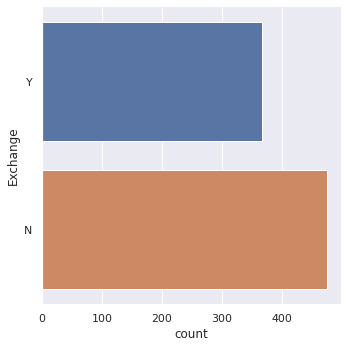

In [ ]:
sb.catplot(y = 'Exchange', data = df, kind = "count")

There is slightly more "N" than "Y", meaning that there is a slight class imbalance. This may lead to an imbalance in the False Positives and False Negatives in the confusion matrix, where False Negatives are higher in number than False Positives, as "N" was more likley in the data. 
Hence, we duplicate Y values to ensure equal "Y" and "N" data size for a fairer classification. 

### Upsample to balance the "Y" and "N" classes

In [ ]:
# Upsample "Y" to match "N"
from sklearn.utils import resample

Yes = df[df.Exchange == 'Y']
No = df[df.Exchange == 'N']
 
# Upsample the "Y" samples
Yes_Up = resample(Yes, 
                        replace=True,             # sample with replacement
                        n_samples=No.shape[0])    # to match number of N
 
# Combine the two classes back after upsampling
df_final = pd.concat([Yes_Up, No])
 
# Check the ratio of the classes
df_final['Exchange'].value_counts()

N    476
Y    476
Name: Exchange, dtype: int64

In [ ]:
# view the final data set
df_final

,Unnamed: 0,WID,Label,Eth Balance,Txn Count,Exchange,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
113,113,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,Bittrex,6090.819190,11133470.0,Y,10002.0,5065.0,4937.0,0.0,18.0,18.0,1.03
179,179,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2,FTX Exchange,221468.466722,3575544.0,Y,10000.0,4404.0,5596.0,0.0,0.0,0.0,0.79
29,29,0x8f22f2063d253846b53609231ed80fa571bc0c8f,Binance 13,1.157549,545203.0,Y,10000.0,19.0,9981.0,0.0,0.0,0.0,0.00
70,70,0xc56fefd1028b0534bfadcdb580d3519b5586246e,Bitfinex 11,95263.263235,1.0,Y,6.0,6.0,0.0,0.0,0.0,0.0,1000.00
45,45,0x06a0048079ec6571cd1b537418869cde6191d42d,Binance 29,37913.561938,5.0,Y,242.0,241.0,1.0,0.0,0.0,0.0,241.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,839,0xfba17aca0797f72bd8152c5e519100c0c4caf0ad,NaN,18.701764,924.0,N,419.0,215.0,204.0,0.0,0.0,0.0,1.05
840,840,0xfbbe05954c6b138999548171c272a1b109d89471,NaN,0.197973,214.0,N,23.0,14.0,9.0,0.0,0.0,0.0,1.56
841,841,0xfefa8d5093ffd962a094fdba722a2c30d1c7a822,NaN,0.858955,28.0,N,0.0,0.0,0.0,0.0,4.0,4.0,1.00
842,842,0xff64a8933e05c9d585ab72db95d207ebee9be5a8,NaN,30106.172270,22.0,N,104.0,104.0,0.0,0.0,0.0,0.0,1000.00


The ratio of Y to N is now 50:50. We now have our final data set. 

In [ ]:
# check statistics of the data
df_final.describe()

,Unnamed: 0,Eth Balance,Txn Count,ERC 20 Txn,ERC 20 Txn In,ERC 20 Txn Out,ERC721 Txn Out,ERC721 Txn In,ERC721 Txn,Ratio Transfers
count,952.000000,9.520000e+02,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.00000,952.000000
mean,396.424370,1.378126e+04,3.200982e+05,2812.721639,1424.013655,1388.313025,5.861345,18.014706,23.87605,152.134023
std,241.800033,8.475278e+04,1.095045e+06,4253.065800,2471.215159,2512.021172,46.642697,117.606474,154.70437,346.012852
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,184.750000,1.946130e-02,3.075000e+01,12.000000,7.000000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,367.500000,4.049294e-01,4.695000e+02,165.000000,116.500000,13.000000,0.000000,0.000000,0.00000,1.380000
75%,605.250000,1.046908e+02,4.712900e+04,8705.500000,1260.250000,1457.000000,0.000000,1.000000,1.00000,14.290000
max,843.000000,2.003505e+06,1.113347e+07,10058.000000,10000.000000,9994.000000,1178.000000,2183.000000,2591.00000,1000.000000


In [ ]:
df_final.to_csv('cleanData.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=696215f1-387b-461d-aa4c-0ccf546cb4fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>